In [18]:
import pandas as pd
import numpy as np

df = pd.read_excel("./data.xlsx")
mask = (df["原始诊断"]!="无诊断") & (df["统计项"]=="标准片数") & (df["来源"] == "门诊")
df = df.loc[mask,:]
df

,区域,医院级别,日期,报销,来源,科室名称,关注科室,药品编码,通用名,商品名,...,统计项,原始诊断,高血压,冠心病,糖尿病,血脂异常,卒中,慢性肾病,心力衰竭,高尿酸
0,郑州,一、二级,20Q3,自费,门诊,中医科,其他,C050060,厄贝沙坦,吉加,...,标准片数,高血压病,1,0,0,0,0,0,0,0
1,郑州,一、二级,20Q3,自费,门诊,中医科,其他,C050060,厄贝沙坦,吉加,...,标准片数,高血压病,1,0,0,0,0,0,0,0
2,郑州,一、二级,20Q3,自费,门诊,心内科,心内科,C050060,厄贝沙坦,安博维,...,标准片数,冠心病,0,1,0,0,0,0,0,0
3,郑州,一、二级,20Q3,自费,门诊,心内科,心内科,C050051,氯沙坦,氯沙坦钾(华海),...,标准片数,高血压病,1,0,0,0,0,0,0,0
4,郑州,一、二级,20Q3,自费,门诊,心内科,心内科,C050037,培哚普利,雅施达,...,标准片数,冠心病,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471777,北京,三级,19Q4,部分报销,门诊,ICU,其他,C050037,培哚普利,雅施达,...,标准片数,"冠状动脉粥样硬化性心脏病,稳定型心绞痛,陈旧性前壁心肌梗死,2型糖尿病,高脂血症,反流性食管...",1,0,1,1,0,0,0,0
471778,北京,三级,19Q4,部分报销,门诊,ICU,其他,C050037,培哚普利,雅施达,...,标准片数,"冠状动脉粥样硬化性心脏病,高血压病3级(高危),反流性食管炎,高脂血症,",1,1,0,1,0,0,0,0
471779,北京,三级,19Q4,部分报销,门诊,ICU,其他,C050037,培哚普利,雅施达,...,标准片数,"冠状动脉粥样硬化性心脏病,高血压(原因待查),反流性食管炎,高脂血症,",1,1,0,1,0,0,0,0
471780,北京,三级,19Q4,部分报销,门诊,ICU,其他,C050037,培哚普利,雅施达,...,标准片数,"冠状动脉肌桥,冠状动脉粥样硬化性心脏病,不稳定型心绞痛,高血压病1级(极高危),反流性食管炎,",1,1,0,0,0,0,0,0


In [39]:
import sys
sys.path.append('C:/Users/chencheng/PycharmProjects/MultiLabelClassifier')

In [55]:
from chart_func import *

df_labels = df.iloc[:,-8:].multiply(df["统计值"], axis="index")
total_number = df["统计值"].sum()
print(total_number)
total_como = df_labels.sum() / total_number
total_como.sort_values(ascending=False, inplace=True)
total_como.to_clipboard() 

20189064.0


In [56]:
from itertools import chain, combinations

def all_subsets(ss):
    return list(chain(*map(lambda x: combinations(ss, x), range(1, len(ss)+1))))

In [65]:
df_combinations = df.iloc[:,-8:].apply(lambda s: [s.name if v == 1 else np.nan for v in s])
df_combinations = df_combinations.T.apply(lambda x: tuple(x.dropna().tolist()))
df_combinations = pd.concat([df_combinations, df["统计值"]], axis=1)
df_combinations.columns = ["高血压合并症", "统计值"]
df_combinations = df_combinations.groupby(['高血压合并症']).sum()
df_combinations['占比'] = df_combinations['统计值'] / total_number
df_combinations.to_csv("./combinations.csv", encoding="utf_8_sig")

In [73]:
df_combinations.nlargest(20, "占比")

,统计值,占比
高血压合并症,,
"(高血压,)",7062757.0,0.349831
"(冠心病,)",1677201.0,0.083075
"(高血压, 冠心病)",1636997.0,0.081083
"(高血压, 冠心病, 血脂异常)",1398799.0,0.069285
"(慢性肾病,)",1330630.5,0.065908
(),1142173.0,0.056574
"(高血压, 糖尿病)",596647.5,0.029553
"(高血压, 血脂异常)",588632.5,0.029156
"(糖尿病,)",536658.0,0.026582


In [72]:
for i in range(5):
    df_cofn = df_combinations[df_combinations.index.map(len) == i+1]
    print(df_cofn.nlargest(10, "占比"))

               统计值        占比
高血压合并症                      
(高血压,)   7062757.0  0.349831
(冠心病,)   1677201.0  0.083075
(慢性肾病,)  1330630.5  0.065908
(糖尿病,)    536658.0  0.026582
(卒中,)     217187.5  0.010758
(血脂异常,)   129149.0  0.006397
(高尿酸,)     53714.5  0.002661
(心力衰竭,)    38058.0  0.001885
                   统计值        占比
高血压合并症                          
(高血压, 冠心病)   1636997.0  0.081083
(高血压, 糖尿病)    596647.5  0.029553
(高血压, 血脂异常)   588632.5  0.029156
(高血压, 慢性肾病)   458218.0  0.022696
(高血压, 卒中)     372629.5  0.018457
(高血压, 高尿酸)    105179.5  0.005210
(冠心病, 糖尿病)     85272.0  0.004224
(糖尿病, 慢性肾病)    77404.5  0.003834
(冠心病, 血脂异常)    44081.0  0.002183
(高血压, 心力衰竭)    35223.0  0.001745
                         统计值        占比
高血压合并症                                
(高血压, 冠心病, 血脂异常)   1398799.0  0.069285
(高血压, 糖尿病, 血脂异常)    239941.0  0.011885
(高血压, 冠心病, 糖尿病)     225157.0  0.011152
(高血压, 冠心病, 卒中)      160846.0  0.007967
(高血压, 慢性肾病, 高尿酸)    128874.0  0.006383
(高血压, 糖尿病, 慢性肾病)    109208.0  0.005409
(高

In [74]:
df_combinations.reset_index(inplace=True)
df_combinations['高血压合并症'] = df_combinations['高血压合并症'].apply(lambda x: all_subsets(x))

In [108]:
df_allss = df_combinations.explode("高血压合并症").groupby("高血压合并症").sum()
df_allss.to_csv("./allss.csv", encoding="utf_8_sig")
df_sofn = df_allss[(df_allss.index.map(len) == 2) & (df_allss.index.map(lambda x:"高血压" in tuple(x)) == True)]
df_sofn.index = df_sofn.index.map(lambda x: "%s+%s" % (x[0], x[1]))
df_sofn.nlargest(20, "占比").to_clipboard()

In [81]:
def get_ss_venn3(set3):
    allss = all_subsets(set3)
    ss = df_allss.loc[allss,"占比"]

    ss111 = ss[6]
    ss011 = ss[5] - ss111
    ss101 = ss[4] - ss111
    ss110 = ss[3] - ss111
    ss001 = ss[2] - (ss[4] + ss[5] - ss111)
    ss010 = ss[1] - (ss[3] + ss[5] - ss111)
    ss100 = ss[0] - (ss[3] + ss[4] - ss111)
    ss_venn = (ss100, ss010, ss110, ss001, ss101, ss011, ss111)
    return ss_venn, [ss[0], ss[1], ss[2]]

In [104]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3, venn3_circles
import matplotlib.font_manager as fm

# 设置matplotlib正常显示中文和负号
mpl.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
mpl.rcParams['axes.unicode_minus']=False     # 正常显示负号


def plot_venn3(set3):
    color_dict = {
        "高血压": "darkblue",
        "冠心病": "deepskyblue",
        "糖尿病": "pink",
        "血脂异常": "crimson",
        "卒中": "darkgreen",
        "慢性肾病":"darkorange"
    }


    fig = plt.figure(figsize=(5,5))
    ax = fig.subplots(1)

    set_labels = set3
    subsets, share = get_ss_venn3(set_labels)
    set_colors = (color_dict[k] for k in set_labels)
    v = venn3(subsets=subsets, subset_label_formatter=lambda v: '{:.1%}'.format(v), set_labels = set_labels, set_colors=set_colors)
    c = venn3_circles(subsets=subsets, linewidth=1)

    set_labelsAlpha = ["A", "B", "C"]
    for i,label in enumerate(set_labels): # 给各适应症打上自身并集占比
        v.get_label_by_id(set_labelsAlpha[i]).set_text("%s(%s)" % (label, '{:.1%}'.format(share[i])))

    # plt.annotate('无合并\n%s%s的\n%s患者' % (set_labels[1], set_labels[2], set_labels[0]), xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
    #             ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
    #             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
    plt.title("%s/%s/%s\n\n总体%s" % (set_labels[0], set_labels[1], set_labels[2], '{:.1%}'.format(sum(subsets))), fontsize=18)

    plt.savefig("./plots/%s.png" % ''.join(set_labels), format="png", bbox_inches="tight", transparent=True, dpi=600)


c:\Users\chencheng\PycharmProjects\MultiLabelClassifier\venv37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


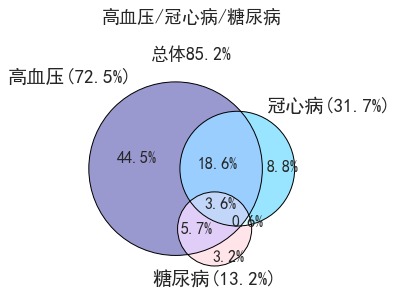

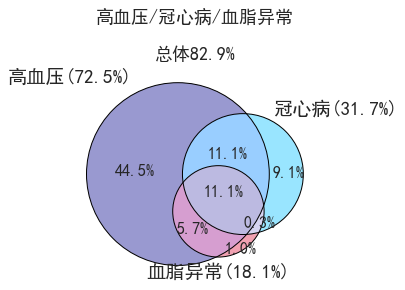

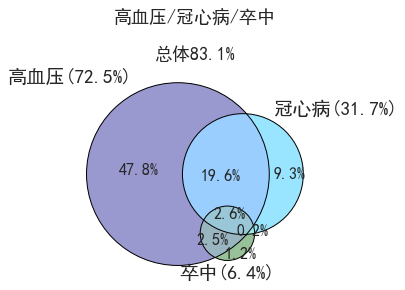

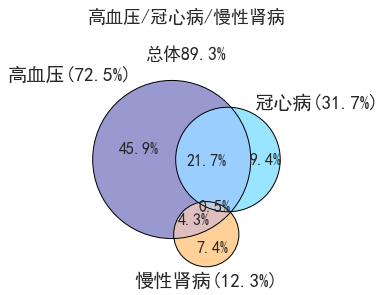

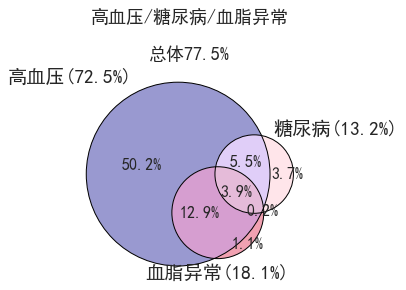

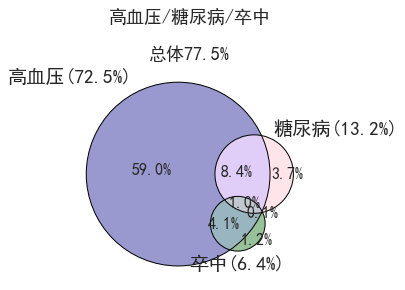

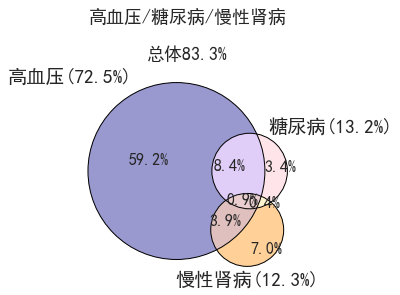

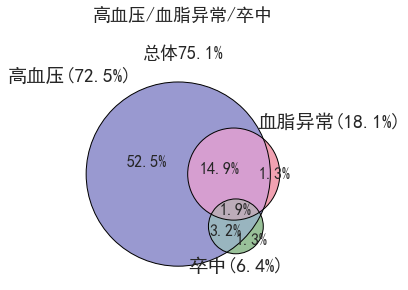

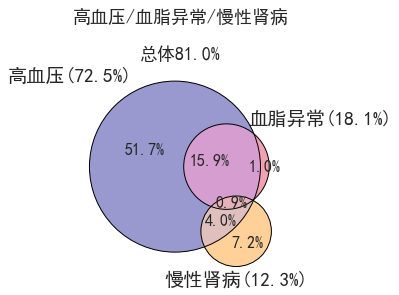

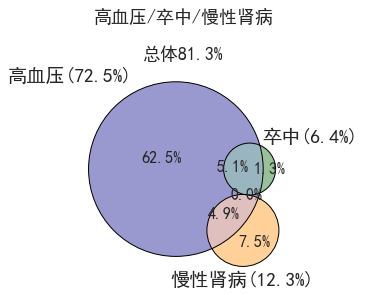

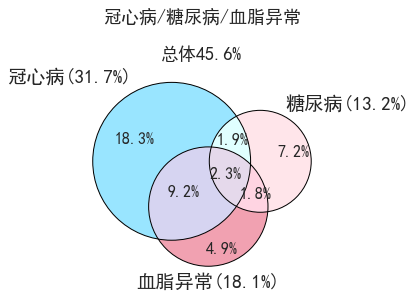

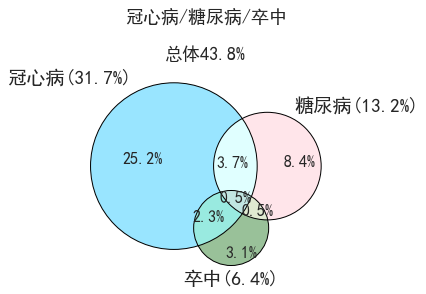

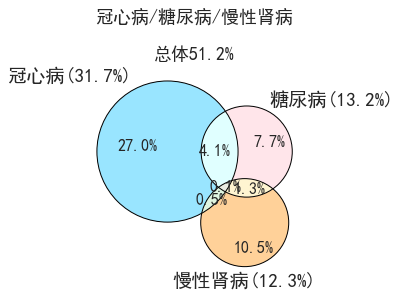

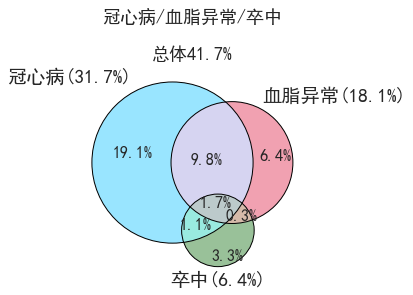

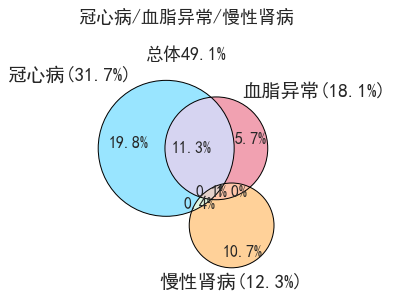

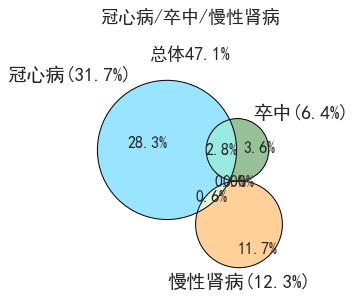

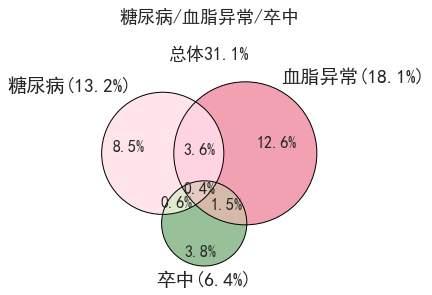

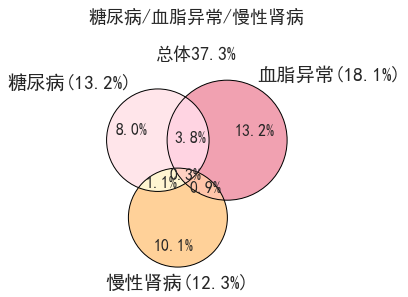

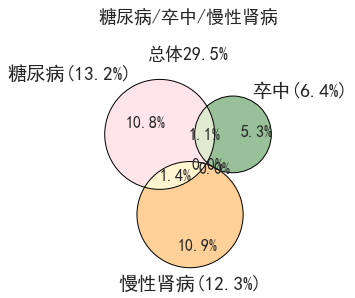

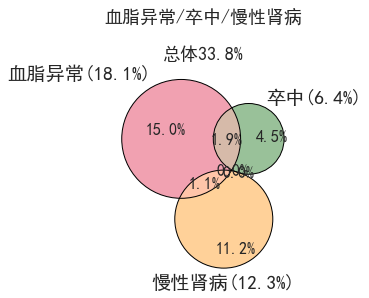

In [103]:
labels = df.columns[-8:-2]
set3 = combinations(labels, 3)

for set in set3:
    plot_venn3(set)
